# 获取前n个主成分
> 上一节以二维线性方程为例，实际获取的只是第一主成分，本节将扩展到n+1维中，获取前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

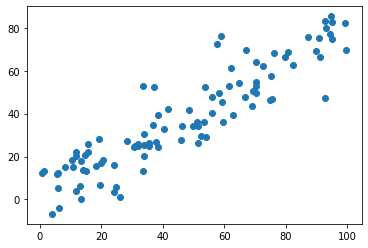

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## 上一节得到的求解第1主成分的方法封装

In [6]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

'''获取第一个主成分'''
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.7766237 , 0.62996478])

## 获取前n个主成分
> 在获取第1主成分后，要获取第二个主成分，只需要将数据在第一个主成分上的分量去掉，然后对剩下的数据再求一次主成分即为第2主成分，后面的主成分获取也是类似的方法
![将第一个主成分从数据中拿掉](images/将第一个主成分从数据中拿掉.png)

>在新的数据上求第1主成分，即为原始数据的第2主成分

In [8]:
# 下面从原始数据X中把第一主成分全部去掉，得到计算第2主成分需要的数据。这是方法1，下面有方法2，可以简化为向量点乘
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

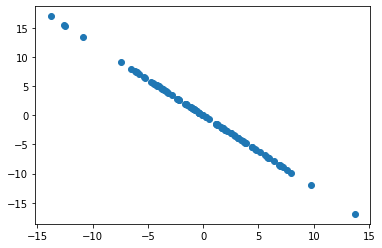

In [9]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [10]:
# 方法2：直接用向量点乘计算效果和上面循环相减的结果是一样地
X2 = X - X.dot(w).reshape(-1, 1) * w

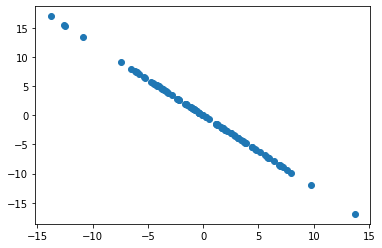

In [11]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [12]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.6299673 , -0.77662166])

In [13]:
w.dot(w2) # 结果接近0，证明两个向量是互相垂直地，即相邻的两个主成分向量是互相垂直的

3.2462281718270702e-06

In [14]:
'''获取前n个主成分'''
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1]) # 生成初始搜索点
        w = first_component(X_pca, initial_w, eta) # 不断地对当前的数据求第1主成分，就得到原始数据的第i个主成分
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w # 去除本次得到的主成分分量，剩下的数据在下一次循环中再进行求第1主成分
        
    return res

In [18]:
res = first_n_components(2, X) # 输入是二维数据所以只有两个主成分。有几个特征(几列)就有几个主成分
res

[array([0.77477398, 0.63223831]), array([ 0.63224099, -0.7747718 ])]

In [19]:
res[0].dot(res[1]) # 非常接近0， 可以看出相邻的两个主成分是互相垂直的

3.448300377295599e-06